In [1]:
!pip install xlrd
import pandas as pd
file=pd.read_excel('sales.xls')
file.head()
furniture=file.loc[file['Category']=='Furniture']
furniture.head()
furniture=furniture[['Order Date','Sales']]
furniture=furniture.sort_values(by=['Order Date'],ascending=True)
furniture.head()
furniture=furniture.set_index('Order Date')
furniture.head()
furniture.isnull().sum()

Sales    0
dtype: int64

In [45]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

furniture = furniture.set_index('Order Date')
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [49]:
sampled = furniture['Sales'].resample('MS').mean()
sampled.head()
sampled=pd.DataFrame(sampled)

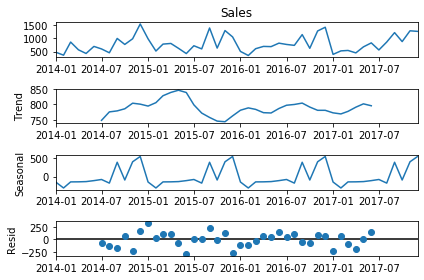

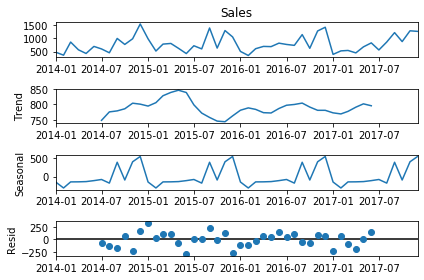

In [50]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sampled['Sales'], model='additive')
result.plot()

In [56]:
#using auto arima to determine paramters for SARIMA
!pip install pmdarima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(sampled, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA(1,2,1)x(0,1,1,12) [intercept=True]; AIC=485.943, BIC=493.574, Time=2.328 seconds
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=True]; AIC=526.315, BIC=529.368, Time=0.036 seconds
Fit ARIMA(1,2,0)x(1,1,0,12) [intercept=True]; AIC=505.062, BIC=511.167, Time=0.721 seconds
Fit ARIMA(0,2,1)x(0,1,1,12) [intercept=True]; AIC=492.862, BIC=498.968, Time=1.600 seconds
Near non-invertible roots for order (0, 2, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(0,2,0)x(0,1,0,12) [intercept=False]; AIC=524.319, BIC=525.845, Time=0.056 seconds
Fit ARIMA(1,2,1)x(0,1,0,12) [intercept=True]; AIC=489.169, BIC=495.275, Time=0.664 seconds
Near non-invertible roots for order (1, 2, 1)(0, 1, 0, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(1,2,1)x(1,1,1,12) [intercept=True]; AIC=487.766, BIC=496.924, Time=2.964 seconds
N

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   48
Model:             SARIMAX(0, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -234.806
Date:                              Tue, 23 Jun 2020   AIC                            479.612
Time:                                      20:04:02   BIC                            487.244
Sample:                                           0   HQIC                           482.215
                                               - 48                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0939      0.845      1.295      0.195      -0.562       2.750
ma.L1         -1.9785     12.952     -0.153      0.879     -27.364      23.407
ma.L2          0.9956     12.967      0.077      0.939     -24.418      26.410
ma.S.L12      -0.9765     11.354     -0.086      0.931     -23.230      21.277
sigma2      2.973e+04   5.91e+05      0.050      0.960   -1.13e+06    1.19e+06
===================================================================================
Ljung-Box (Q):                       27.42   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.74   Prob(JB):                         0.38
Heteroskedasticity (H):               0.46   Skew:                            -0.34
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

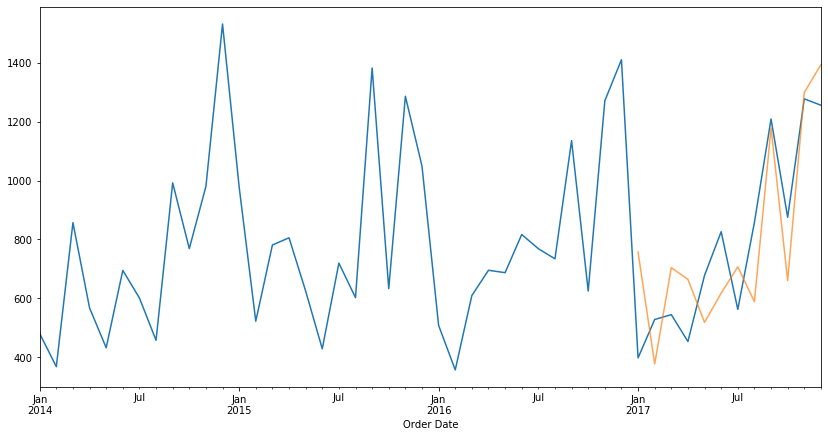

In [60]:
ax = resampled['2014':].plot()
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
#using the order determined above in SARIMAX model
mod = sm.tsa.statespace.SARIMAX(sampled,
                                order=(0, 2, 2),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
result=mod.fit()
pred = result.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred.predicted_mean.plot(ax=ax,alpha=.7, figsize=(14, 7))

In [58]:
print(result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Sales   No. Observations:                   48
Model:             SARIMAX(0, 2, 2)x(0, 1, [1], 12)   Log Likelihood                -127.032
Date:                              Tue, 23 Jun 2020   AIC                            262.063
Time:                                      20:05:44   BIC                            265.841
Sample:                                  01-01-2014   HQIC                           262.702
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -2.2899      1.427     -1.605      0.108      -5.086       0.506
ma.L2          1.28

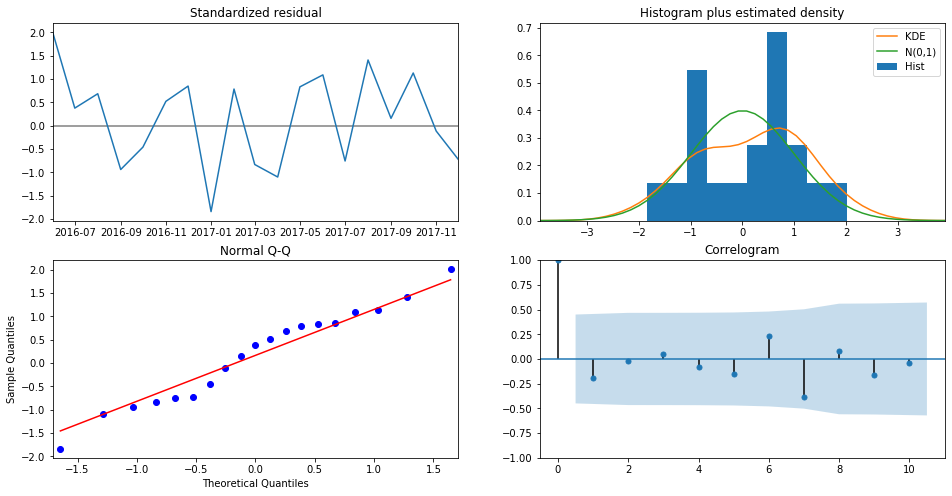

In [59]:
result.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
refrence:An End-to-End Project on Time Series Analysis and Forecasting with Python,towardsdatascience,Susan LI